<P> <img src="https://i.ibb.co/gyNf19D/nhslogo.png" alt="nhslogo" border="0" width="100" align="right"><font size="6"><b> CS4132 Data Analytics</b> </font>

# Lab 9: Data Communication

Complete the following questions and upload your `.ipynb` file to Coursemology.

Name the file in the following format:

`Lab<Num><YourName>.ipynb`

We will be using the dataset on Canadian Immigration below:

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )
#perform some data cleaning
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Viet Nam,Asia,South-Eastern Asia,Developing regions,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
Western Sahara,Africa,Northern Africa,Developing regions,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
Yemen,Asia,Western Asia,Developing regions,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985


## Line plot & Labeling

#### a) Plot a line graph to visualize the number of immigrants from India, China and Philippines over the years. 

You should hide the legend. Instead, label the line using `.text()` function. 

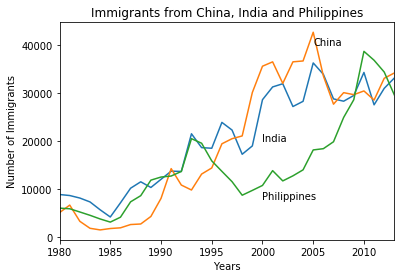

In [3]:
#Your final graph should look as follows:

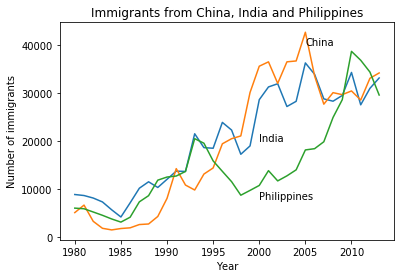

In [45]:
#your solution
df_a = df_can.loc[['India', 'China', 'Philippines']].iloc[:, 3:-1]
plt.title('Immigrants from China, India and Philippines')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.text(2000,
         8000,'Philippines')
plt.text(2000,20000,'India')
plt.text(2005,40000,'China')
plt.plot(df_a.T)

## Area Charts

#### b) Create a stacked area plot of the 5 countries that contributed the most to immigration to Canada from 1980 to 2013. Use a transparency value of 0.25.

In [84]:
#Your final graph should look as follows:

Text(0.5, 0, 'Year')

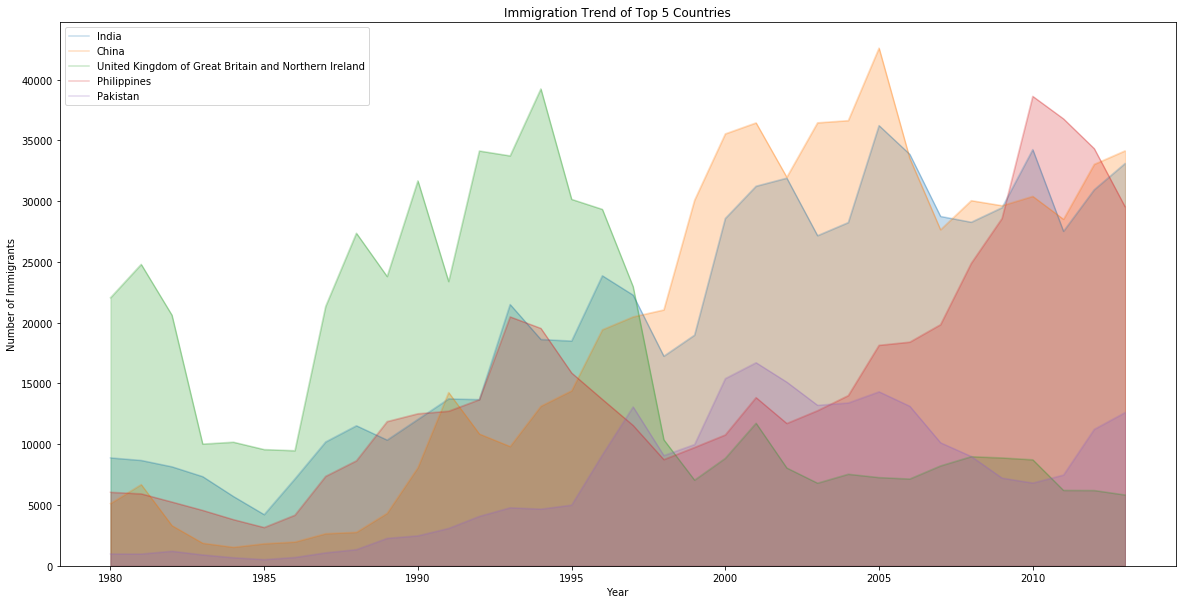

In [86]:
#your solution

df_b = df_can.sort_values(by='Total',ascending=False).iloc[:5,3:-1]
df_b.T.plot(figsize=(20,10),kind='area',stacked=False,alpha=0.25)
plt.legend(df_b.index)
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Year')

## Annotation

#### c) Let's compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013. Plot a bar graph which shows the number of immigrants per year.

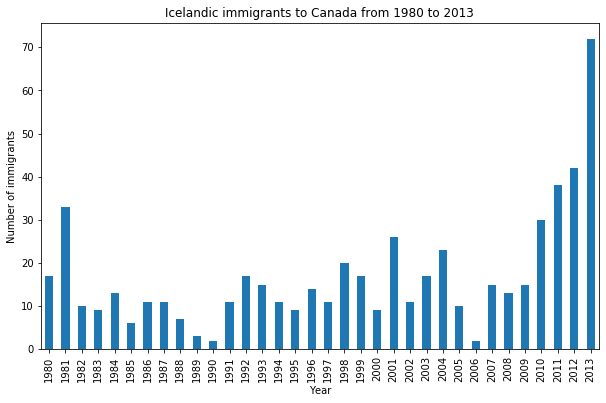

In [6]:
#Your final graph should look as follows:

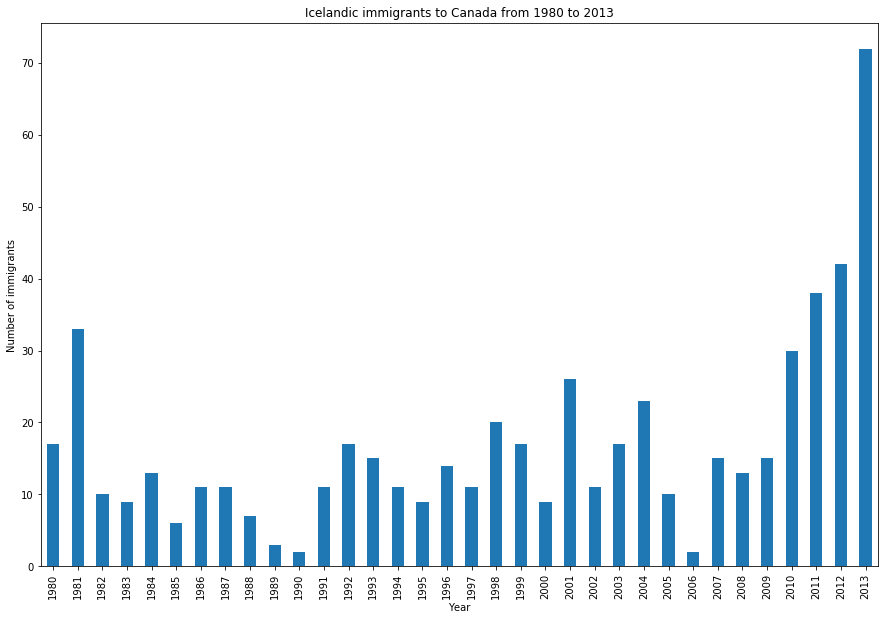

In [90]:
#your solution
df_c = df_can.iloc[:,3:-1].loc['Iceland']
df_c.plot(figsize=(15,10), kind='bar')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
df_cp

#### d) The bar plot in (c) shows the total number of immigrants broken down by each year. We can clearly see the impact of the financial crisis; the number of immigrants to Canada started increasing rapidly after 2008. 

i) Let's annotate this on the plot using the `annotate` method. Draw an arrow using `annotate` to show the rapid increase after 2008.

You should make use of the following parameters:
- `s`: str, the text of annotation.
- `xy`: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- `xytext`: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- `xycoords`: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- `arrowprops`: Takes a dictionary of properties to draw the arrow:
    - `arrowstyle`: Specifies the arrow style, `'->'` is standard arrow.
    - `connectionstyle`: Specifies the connection type. `arc3` is a straight line.
    - `color`: Specifes color of arror.
    - `lw`: Specifies the line width.

ii) Next, let's also annotate a text to go over the arrow.  Label the arrow with the text '2008 - 2011 Financial Crisis'.

You should make use of the following additional parameters:
- `rotation`: rotation angle of text in degrees (counter clockwise)
- `va`: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
- `ha`: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]


You may read the Matplotlib documentation for more details on annotations: 
http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.annotate.

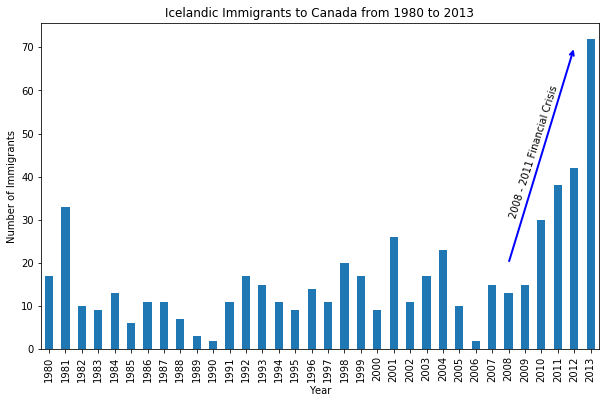

In [8]:
#Your final graph should look as follows:

Text(28.7, 35, '2008-2011 Financial Crisis')

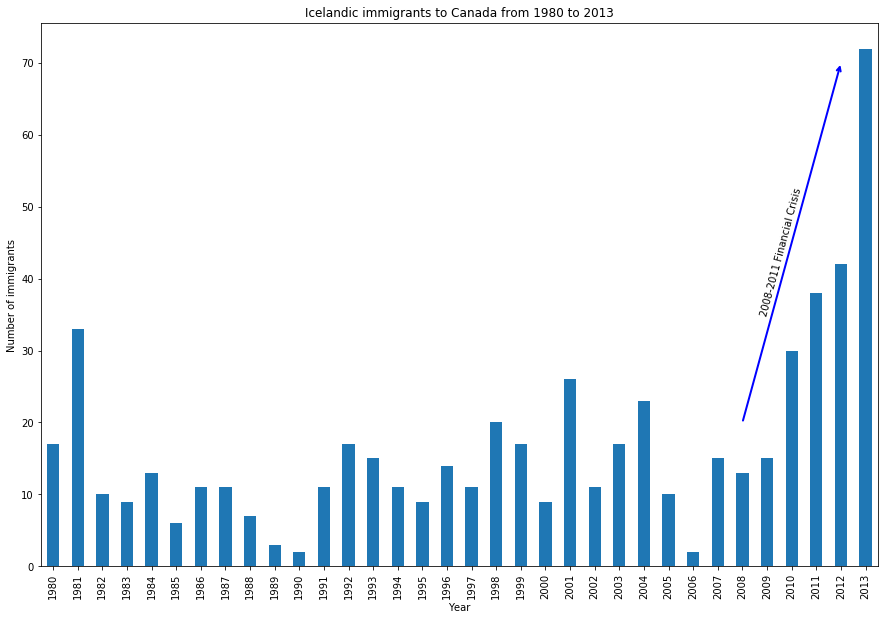

In [133]:
#your solution
# i
df_c = df_can.iloc[:,3:-1].loc['Iceland']
df_c.plot(figsize=(15,10), kind='bar')
plt.ylabel('Number of immigrants')
plt.xlabel('Year')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')
plt.annotate('',xy=(32,70),xytext=(28,20),
             xycoords='data',arrowprops=dict(arrowstyle='->',connectionstyle='arc3',color='blue',lw='2'))

# ii
plt.text(s='2008-2011 Financial Crisis',x=28.7,y=35,rotation=75)

## Subplots

#### e) We will experiment using subplots to create "small multiples" visualization. 

We wish to compare the number of immigrants from India with other top 9 Asian countries. Create a small multiple plot similar to the one shown below.

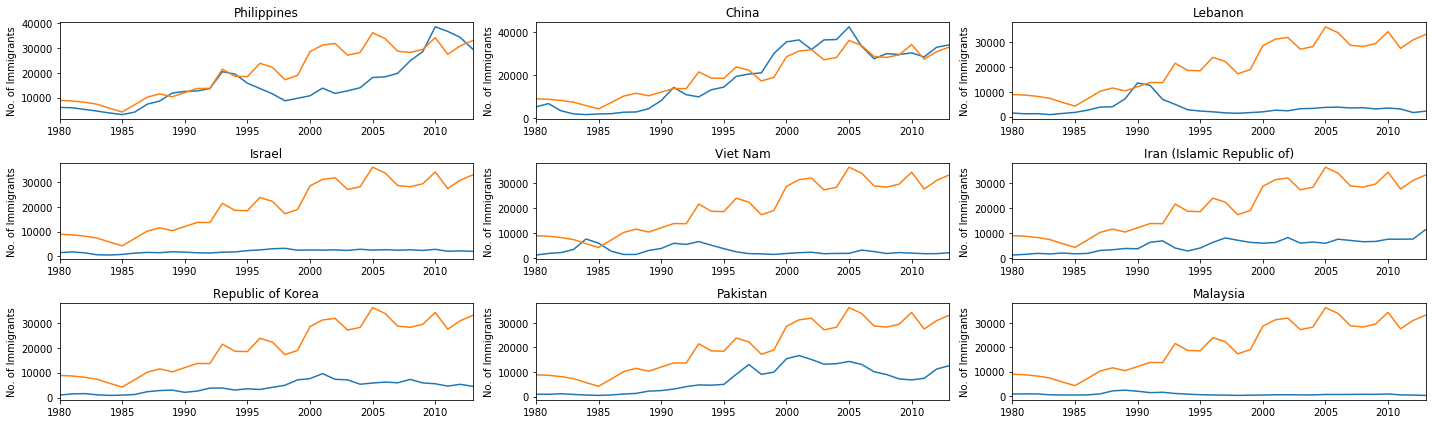

In [9]:
#Your final graph should look as follows:

In [ ]:
#your solution


## Waffle Chart

#### f) We would like to visualize the portion of immigrates from Singapore, Malaysia and Indonesian over the years. Plot a waffle chart. Make sure to have a legend.

You may wish to refer to the pywaffle documentation: https://readthedocs.org/projects/pywaffle/downloads/pdf/latest/

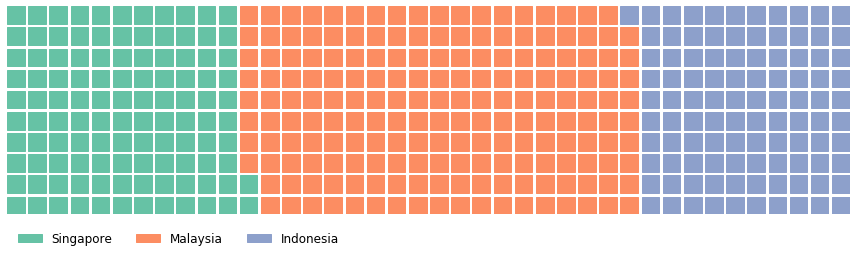

In [12]:
#Your final graph should look as follows:

In [ ]:
#your solution


## Word Cloud

#### g) We would like to visualize the proportion of immigration from countries in Asia over total immigrants from Asia using a word cloud. Create a word cloud using the strategy as covered in the notes.

You may wish to refer to the wordcloud documentation: https://amueller.github.io/word_cloud/

In [ ]:
#your solution


## Maps

#### h) We would like create a choropleth map to visualize the immigration data in 1980 from countries in Asia only. Create a relevant visualization for this. You should zoom your map to Asia, and use the yellow-green color scheme for the map.

In [18]:
#Your final graph should look as follows:

In [ ]:
#your solution


#### i) Add markers for the top 10 countries (i.e. countries with most immigrants in 1980). When clicked, the mark should popup the country's name and the number of immigrants.

Hint: <br>
1) You may use the data from countries.csv for the latitude and longitude values of the countries. <br>
2) You may use HTML tags for the label text in the popup field.

In [23]:
#Your final graph should look as follows:

In [ ]:
#your solution
